## Objectives

1.- Investigate how data points cluster in the ad/absorption energy (Eads) versus C height (h) space.

2.- Observe how the previously identified most relevant features describing Eads are clustered.

3.- Project the feature clustering in the Eads vs h 2-dimensional space.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

sklearn.__version__ # Checking the sklearn version used in this notebook.

'1.0.1'

## Reading Data

In [2]:
data = pd.read_csv("data.csv", sep=';') # Reading data from the .csv file.
columns = [0, 1, 2, 3, 4, 5, 7, 8, 10, 11, 12, 14, 16, 17]
data.drop(data.columns[columns],axis=1,inplace=True) # Eliminating unnecessary columns.

data.columns = ["Ed", "SE", "CNsite", "Eads", "h"]

i=0 # Eliminating unnecessary rows
while data.shape[0] > 81:
    data.drop([data.index[i] , data.index[i+1], data.index[i+2]], inplace=True)
    i = i + 1
data.reset_index(inplace=True)
del data["index"]

data["Eads"] = data["Eads"]*-1 # Turning ad/absorption energies positive to simplify visulization/interpretation.

data_safe = data.copy() # Saving a copy of the "original" dataframe.

columns = [0,1,2]
data.drop(data.columns[columns],axis=1,inplace=True)
data = data[["h", "Eads"]]

## Data Visualization

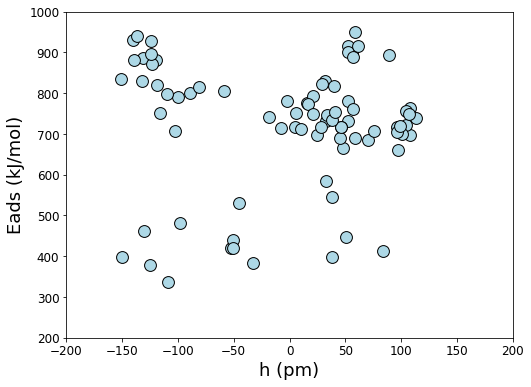

In [3]:
# Here, the data that needs to be clustered is visualized.

plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("h (pm)", fontsize=18)
plt.ylabel("Eads (kJ/mol)",fontsize=18)

plt.xlim([-200,200])
plt.ylim([200,1000])

plt.scatter(
    data["h"], data["Eads"],
    s=140, c='lightblue',
    marker='o', edgecolor='black'
)

plt.show()

## Data Normalization

In [4]:
# Data has to be normalized, since K-Means uses Euclidean distances to measure how "far" data points are.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

## Determining the Optimal Number of Clusters

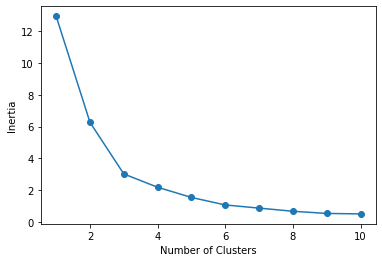

In [5]:
# The number of clusters is an input of the algorithm. Hence, it needs to be determined beforehand.
# Here, the elbow method is used to select the number of clusters. It looks like 3 clusters is the optimal number.

from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    inertia.append(km.inertia_)

inertia = np.array(inertia)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

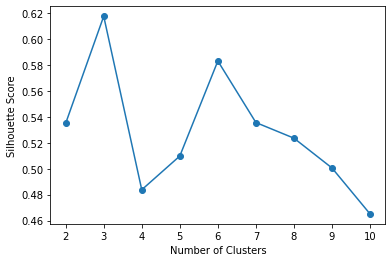

In [6]:
# The Silhouette score is also used to assure that 3 is indeed the optimal number of clusters.

from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for i in range(2, kmax+1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    labels = km.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Fit

In [7]:
# Fitting the method.

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data)

## Results Visualization

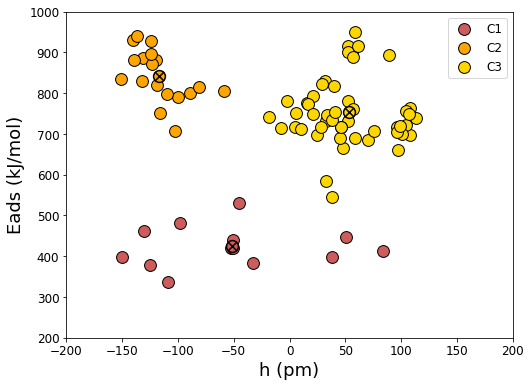

In [8]:
# Here, data is visualized coloured according to which cluster does each of the data points belong to.

data = scaler.inverse_transform(data) # Data is transformed back to its original form (without normalization).

# The center of each of the clusters is shown with a circle of the corresponding colour with a black X mark inside.
centers = scaler.inverse_transform(km.cluster_centers_)

plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("h (pm)", fontsize=18)
plt.ylabel("Eads (kJ/mol)",fontsize=18)

plt.xlim([-200,200])
plt.ylim([200,1000])

plt.scatter(
    data[y_km == 0, 0], data[y_km == 0, 1],
    s=140, c='#CD5C5C',
    marker='o', edgecolor='black',
    label='C1'
)

plt.scatter(
    data[y_km == 1, 0], data[y_km == 1, 1],
    s=140, c='#FFA500',
    marker='o', edgecolor='black',
    label='C2'
)

plt.scatter(
    data[y_km == 2, 0], data[y_km == 2, 1],
    s=140, c='#FFD700',
    marker='o', edgecolor='black',
    label='C3'
)

plt.scatter(
    centers[0, 0], centers[0, 1],
    s=140, facecolor = '#CD5C5C', edgecolor = 'black',
    lw = 1.5
)

plt.scatter(
    centers[1, 0], centers[1, 1],
    s=140, facecolor = '#FFA500', edgecolor = 'black',
    lw = 1.5
)

plt.scatter(
    centers[2, 0], centers[2, 1],
    s=140, facecolor = '#FFD700', edgecolor = 'black',
    lw = 1.5
)

plt.scatter(
    centers[:, 0], centers[:, 1],
    s=80, color = 'black', marker = 'x',
    lw = 1.5
)

plt.legend(loc="best", fontsize=12)

plt.show()

## Features' Clustering

In [9]:
# After clustering the Eads vs h 2-dimensional space, it is time to understand how the most relevant features
# for describing Eads (identified previosly through a random forest regression) are grouped.
 
data = data_safe.copy() # Recovering the original dataframe.

columns = [3,4]
data.drop(data.columns[columns],axis=1,inplace=True) # Eliminating unnecessary columns.

## Data Visualization

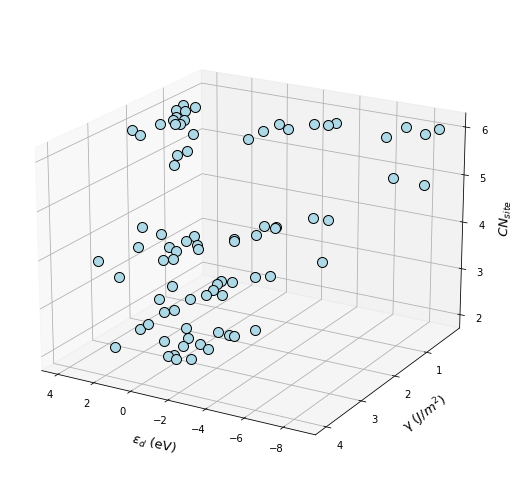

In [10]:
# The data that needs to be clustered is visualized.

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(data["Ed"], data["SE"], data["CNsite"], facecolor = 'lightblue', 
    edgecolor = 'black', s = 100, depthshade = False)

ax.set_xlabel('$ε_d$ (eV)', fontsize = 13, labelpad = 10)
ax.set_ylabel('γ $(J/m^2$)', fontsize = 13, labelpad = 10)
ax.set_zlabel('$CN_{site}$', fontsize = 13, labelpad = 6)

ax.set_yticks([1, 2, 3, 4])
ax.set_zticks([2, 3, 4, 5, 6])

ax.view_init(elev=20, azim=120)

plt.tight_layout()

plt.show()

## Data Normalization

In [11]:
# Data has to be normalized, since K-Means uses Euclidean distances to measure how "far" data points are.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

## Determining the Optimal Number of Clusters

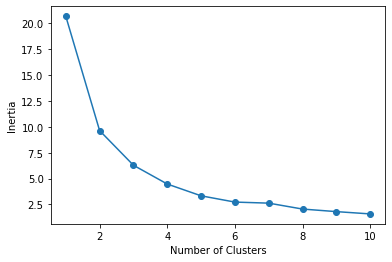

In [12]:
# The number of clusters is an input of the algorithm. Hence, it needs to be determined beforehand.
# Here, the elbow method is used to select the number of clusters. It looks like 3 clusters is the optimal number.

from sklearn.cluster import KMeans
inertia = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    inertia.append(km.inertia_)

inertia = np.array(inertia)
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

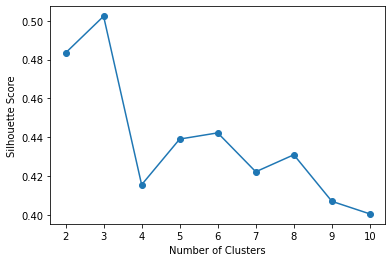

In [13]:
# The Silhouette score is also used to assure that 3 is indeed the optimal number of clusters.

from sklearn.metrics import silhouette_score

sil = []
kmax = 10

for i in range(2, kmax+1):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(data)
    labels = km.labels_
    sil.append(silhouette_score(data, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

## Fit

In [14]:
# Fitting the method.

km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(data)

## Results Visualization

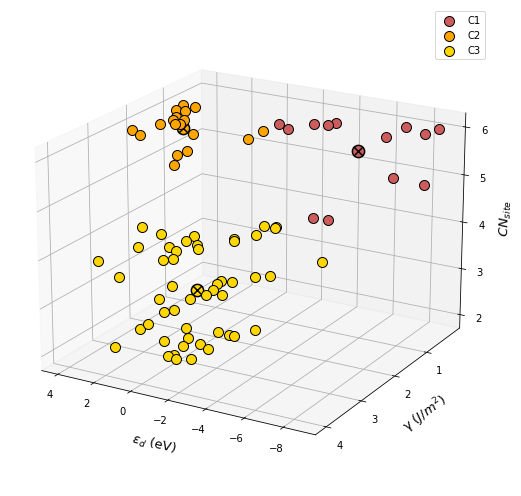

In [15]:
# Here, data is visualized coloured according to which cluster does each of the data points belong to.

data = data_safe.copy() # Recovering the original dataframe.
data["Cluster"] = y_km # Adding a new column indicating to which cluster does each data row belong to.

# Creating one dataframe for each cluster.
C1 = data.loc[data['Cluster'] == 0]
C2 = data.loc[data['Cluster'] == 1]
C3 = data.loc[data['Cluster'] == 2]

# The center of each of the clusters is shown with a circle of the corresponding colour with a black X mark inside.
centers = scaler.inverse_transform(km.cluster_centers_)

fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
ax.scatter3D(C1["Ed"], C1["SE"], C1["CNsite"], facecolor = '#FFD700', edgecolor = 'black', s = 100, depthshade = False, label = "C3")
ax.scatter3D(C2["Ed"], C2["SE"], C2["CNsite"], facecolor = '#CD5C5C', edgecolor = 'black', s = 100, depthshade = False, label = "C1")
ax.scatter3D(C3["Ed"], C3["SE"], C3["CNsite"], facecolor = '#FFA500', edgecolor = 'black', s = 100, depthshade = False, label = "C2")
ax.scatter3D(centers[0,0], centers[0,1], centers[0,2], facecolor = '#FFD700', edgecolor = 'black', lw = 1.5, s = 150, depthshade = False)
ax.scatter3D(centers[1,0], centers[1,1], centers[1,2], facecolor = '#CD5C5C', edgecolor = 'black', lw = 1.5, s = 150, depthshade = False)
ax.scatter3D(centers[2,0], centers[2,1], centers[2,2], facecolor = '#FFA500', edgecolor = 'black', lw = 1.5, s = 150, depthshade = False)
ax.scatter3D(centers[0,0], centers[0,1], centers[0,2], marker = 'x', lw = 1.5, color = 'black', s = 80, depthshade = False)
ax.scatter3D(centers[1,0], centers[1,1], centers[1,2], marker = 'x', lw = 1.5, color = 'black', s = 80, depthshade = False)
ax.scatter3D(centers[2,0], centers[2,1], centers[2,2], marker = 'x', lw = 1.5, color = 'black', s = 80, depthshade = False)


ax.set_xlabel('$ε_d$ (eV)', fontsize = 13, labelpad = 10)
ax.set_ylabel('γ $(J/m^2$)', fontsize = 13, labelpad = 10)
ax.set_zlabel('$CN_{site}$', fontsize = 13, labelpad = 6)

ax.set_yticks([1, 2, 3, 4])
ax.set_zticks([2, 3, 4, 5, 6])

ax.view_init(elev=20, azim=120)

handles,labels = ax.get_legend_handles_labels()

handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]

ax.legend(handles,labels,loc='best')

plt.tight_layout()

plt.show()

## Projection in the 2-dimensional Eads vs. h Space

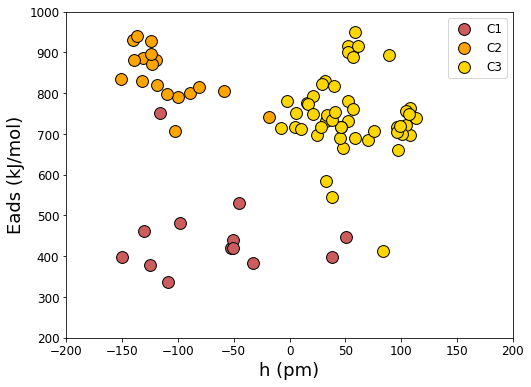

In [16]:
# Using the clustering done for the 3-dimensional feature space, we project the data in the Eads vs h 2-dimensional
# space. It is observed that the resulting plot is very similar to the one obtained through the direct clustering
# of the Eads vs h 2-dimensional space, indicating that these features are well suited to describe such 2-D space.

plt.figure(figsize=(8,6))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("h (pm)", fontsize=18)
plt.ylabel("Eads (kJ/mol)",fontsize=18)

plt.xlim([-200,200])
plt.ylim([200,1000])

plt.scatter(
    C2["h"], C2["Eads"],
    s=140, c='#CD5C5C',
    marker='o', edgecolor='black',
    label='C1'
)

plt.scatter(
    C3["h"], C3["Eads"],
    s=140, c='#FFA500',
    marker='o', edgecolor='black',
    label='C2'
)

plt.scatter(
    C1["h"], C1["Eads"],
    s=140, c='#FFD700',
    marker='o', edgecolor='black',
    label='C3'
)

plt.legend(loc="best", fontsize=12)

plt.show()